<a href="https://colab.research.google.com/github/akalpit23/Interpretable-ML/blob/main/Assignment_03_Interpretable_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AIPI 590 - XAI | Assignment #03



### Akalpit Dawkhar

### **Interpretable ML**


In [9]:
!pip install pygam --quiet pandas lime --quiet shap --quiet
!pip install --upgrade imodels

In [10]:
# Import necessary libraries
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.ensemble import RandomForestClassifier, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from statsmodels.genmod.generalized_linear_model import GLM
from statsmodels.genmod.families import Gamma
from statsmodels.genmod.families.links import Log
from statsmodels.tools import add_constant
from pygam import LinearGAM, GammaGAM, LogisticGAM, s, f
import seaborn as sns
import lime
import shap
from lime.lime_tabular import LimeTabularExplainer

In [11]:
# Please use this to connect your GitHub repository to your Google Colab notebook
# Connects to any needed files from GitHub and Google Drive
import os

# Remove Colab default sample_data
!rm -r ./sample_data

# Clone GitHub files to colab workspace
repo_name = "Interpretable-ML" # Change to your repo name
git_path = 'https://github.com/akalpit23/Interpretable-ML.git' #Change to your path
!git clone "{git_path}"

# Install dependencies from requirements.txt file
#!pip install -r "{os.path.join(repo_name,'requirements.txt')}" #Add if using requirements.txt

# Change working directory to location of notebook
notebook_dir = 'Assignment_03_Interpretable_ML.ipynb'
path_to_notebook = os.path.join(repo_name,notebook_dir)
%cd "{path_to_notebook}"
%ls

rm: cannot remove './sample_data': No such file or directory
fatal: destination path 'Interpretable-ML' already exists and is not an empty directory.
[Errno 20] Not a directory: 'Interpretable-ML/Assignment_03_Interpretable_ML.ipynb'
/content
Interpretable-ML/


In [12]:
# Loading the data
data = pd.read_csv('/content/Interpretable-ML/Telco-Customer-Churn.csv')

# Display the first few rows of the dataset
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Cleaning the Data

In [13]:
# Convert TotalCharges to numeric, it might have missing values or non-numeric entries
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

# Drop rows with missing values in 'TotalCharges'
data = data.dropna(subset=['TotalCharges'])
X = data.drop(['customerID', 'Churn'], axis=1)

# converting yes to 1 and no to 0 and store in y
y = data['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# One-hot encode categorical features
X_encoded = pd.get_dummies(X, drop_first=True, dtype= int)


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_encoded.head(), y.head()

X.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


# Exploratory Data Analysis

Accuracy: 0.7256574271499645
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.80      0.81      1033
           1       0.49      0.53      0.51       374

    accuracy                           0.73      1407
   macro avg       0.65      0.66      0.66      1407
weighted avg       0.73      0.73      0.73      1407

Confusion Matrix:
 [[824 209]
 [177 197]]


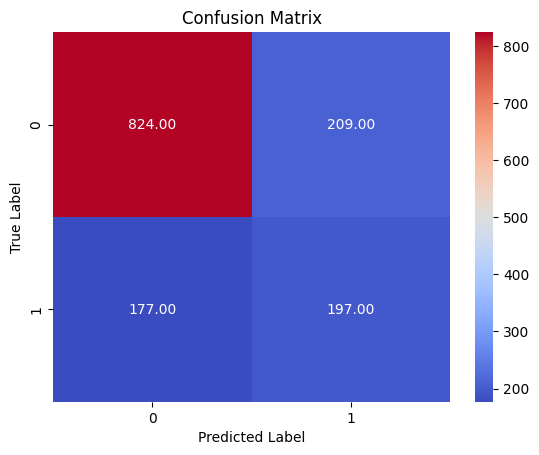

In [14]:
# Train a Decision Tree Classifier
classifier = DecisionTreeClassifier(random_state=42)
classifier.fit(X_train_scaled, y_train)

# Predict the test set
y_pred = classifier.predict(X_test_scaled)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)


# Print evaluation results
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)
print("Confusion Matrix:\n", conf_matrix)

# Confusion matrix heatmap
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap="coolwarm", fmt='.2f')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

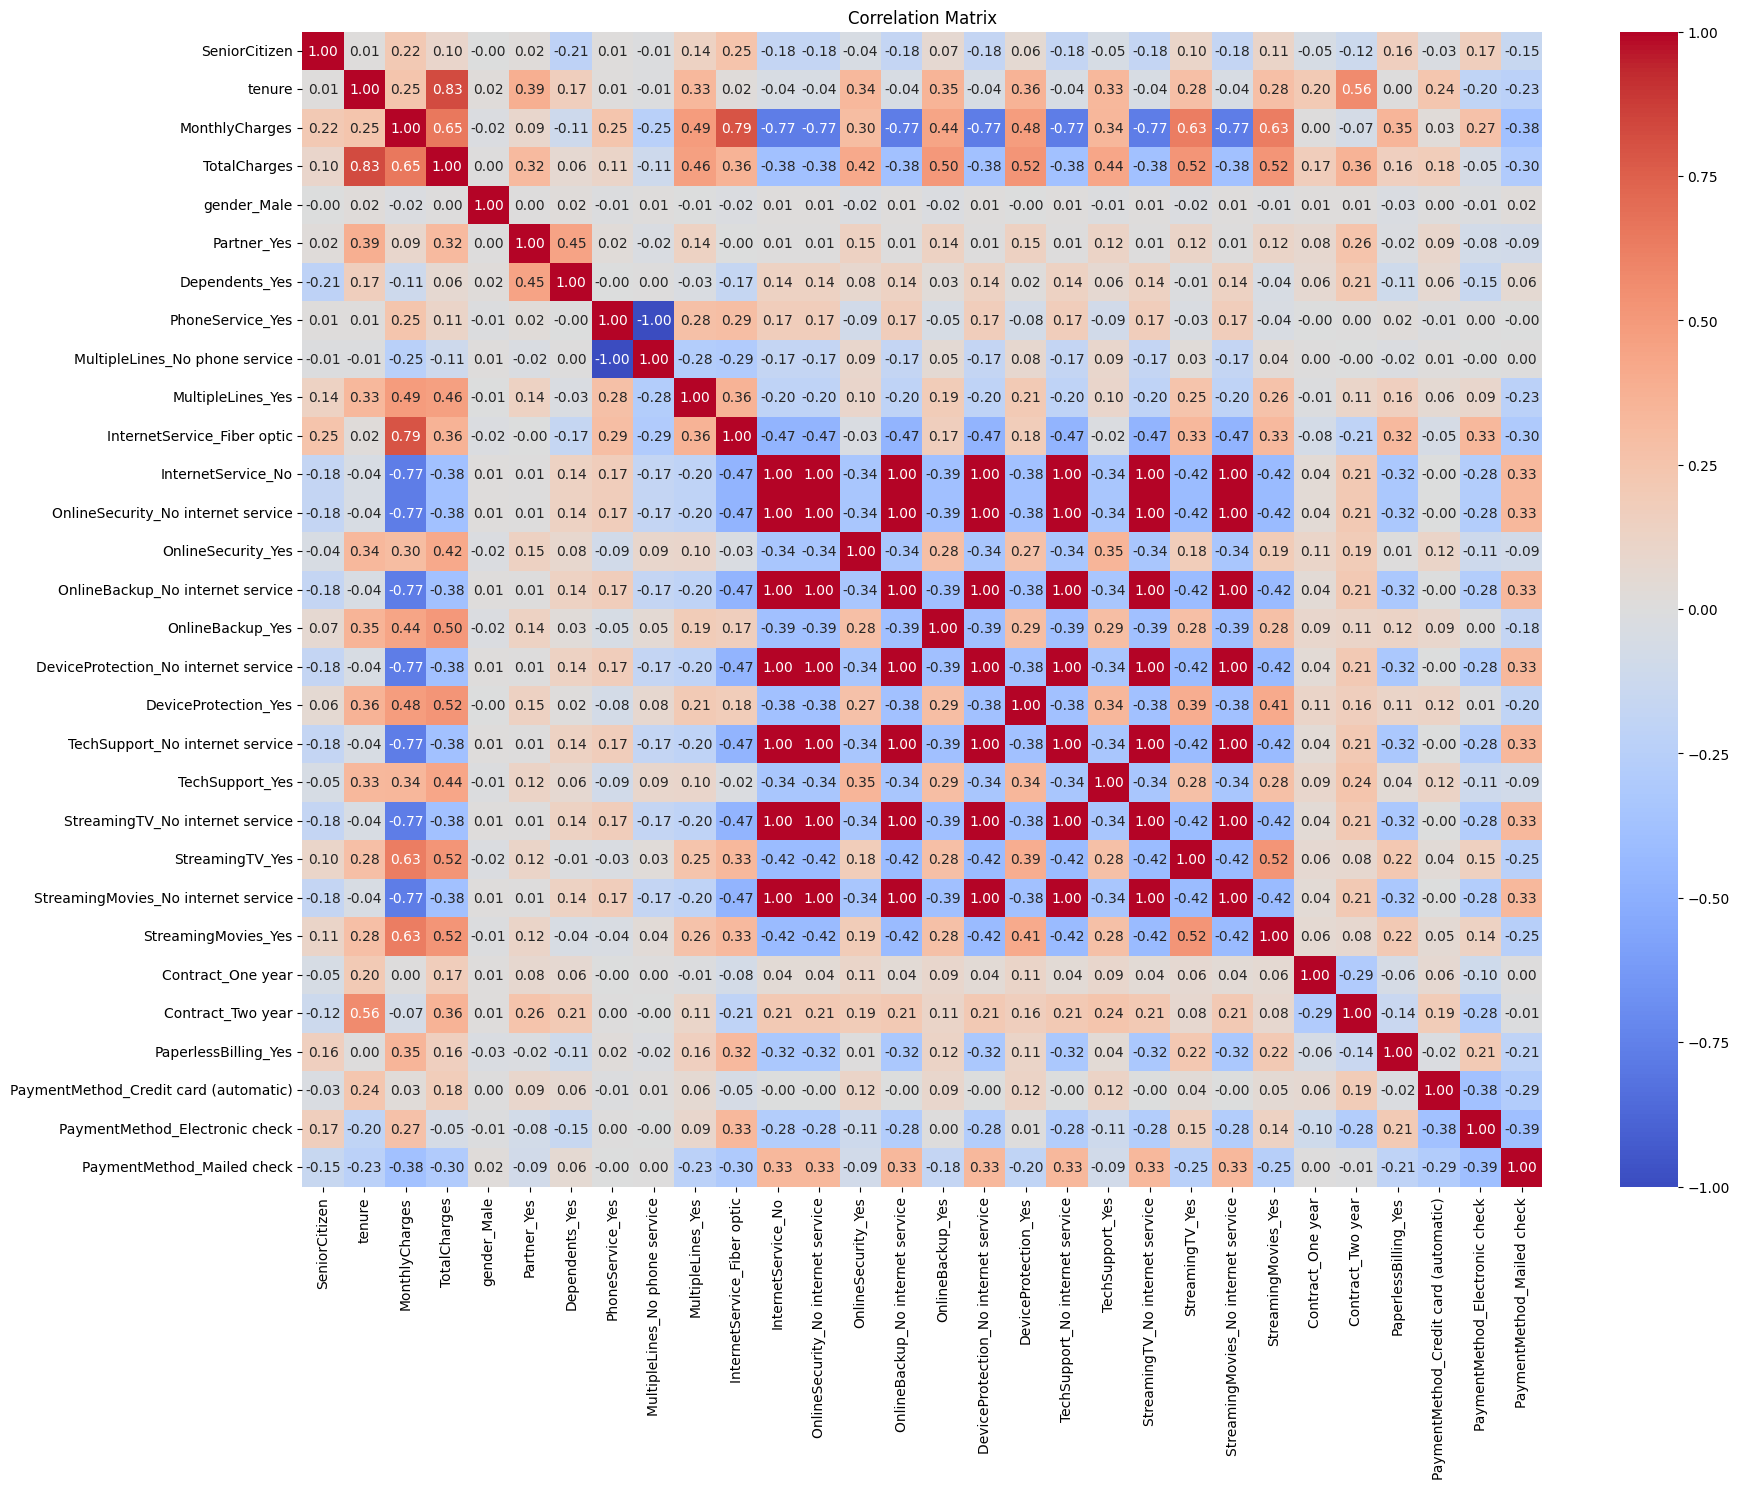

In [15]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)


# 1. Correlation Matrix: Checking multicollinearity between numerical features
plt.figure(figsize=(20, 15))
corr_matrix = X_train_scaled_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [16]:
# Descriptive statistics of the data
desc_stats = data.describe()
print(desc_stats)

       SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7032.000000  7032.000000     7032.000000   7032.000000
mean        0.162400    32.421786       64.798208   2283.300441
std         0.368844    24.545260       30.085974   2266.771362
min         0.000000     1.000000       18.250000     18.800000
25%         0.000000     9.000000       35.587500    401.450000
50%         0.000000    29.000000       70.350000   1397.475000
75%         0.000000    55.000000       89.862500   3794.737500
max         1.000000    72.000000      118.750000   8684.800000


In [17]:
# # Distribution of target variable
# y['columns'].value_counts().plot(kind='bar')
# plt.show()

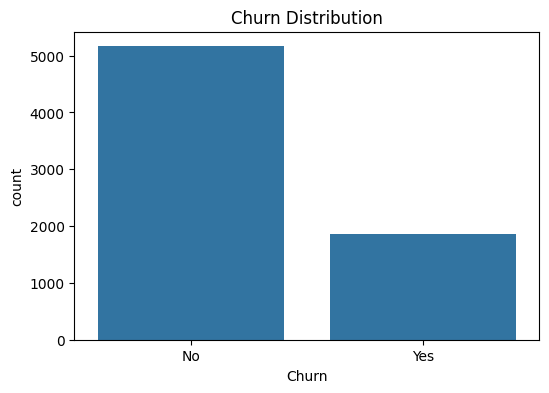

In [18]:
# Churn distribution plot
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=data)
plt.title('Churn Distribution')
plt.show()

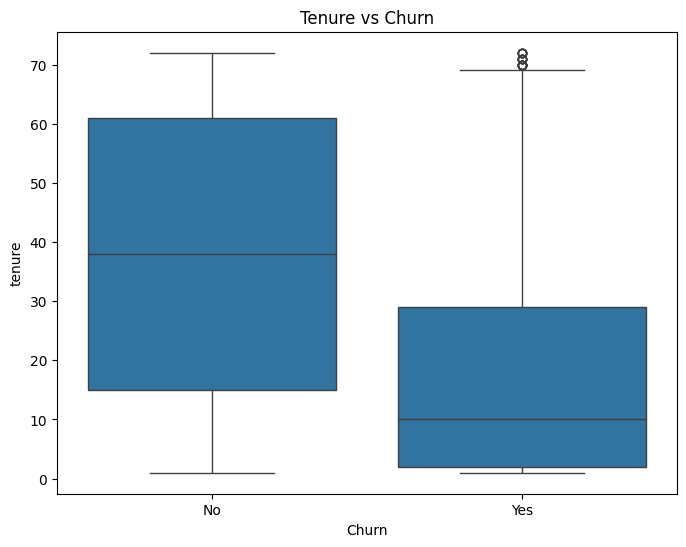

In [19]:
# Feature interaction with Churn (e.g., tenure vs churn)
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='tenure', data=data)
plt.title('Tenure vs Churn')
plt.show()

# Making a Decision Tree

In [21]:
if isinstance(X_train, pd.DataFrame):
    feature_names = X_train.columns
else:
    feature_names = [f"feature_{i}" for i in range(X_train.shape[1])]


# Train a Decision Tree regressor (CART)
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)


DecisionTreeRegressor()

In [22]:
# Check the number of features used to train the regressor
print(f"Number of features used in regressor: {regressor.n_features_in_}")
print(f"Number of columns in data: {len(data.columns)}")

Number of features used in regressor: 30
Number of columns in data: 21


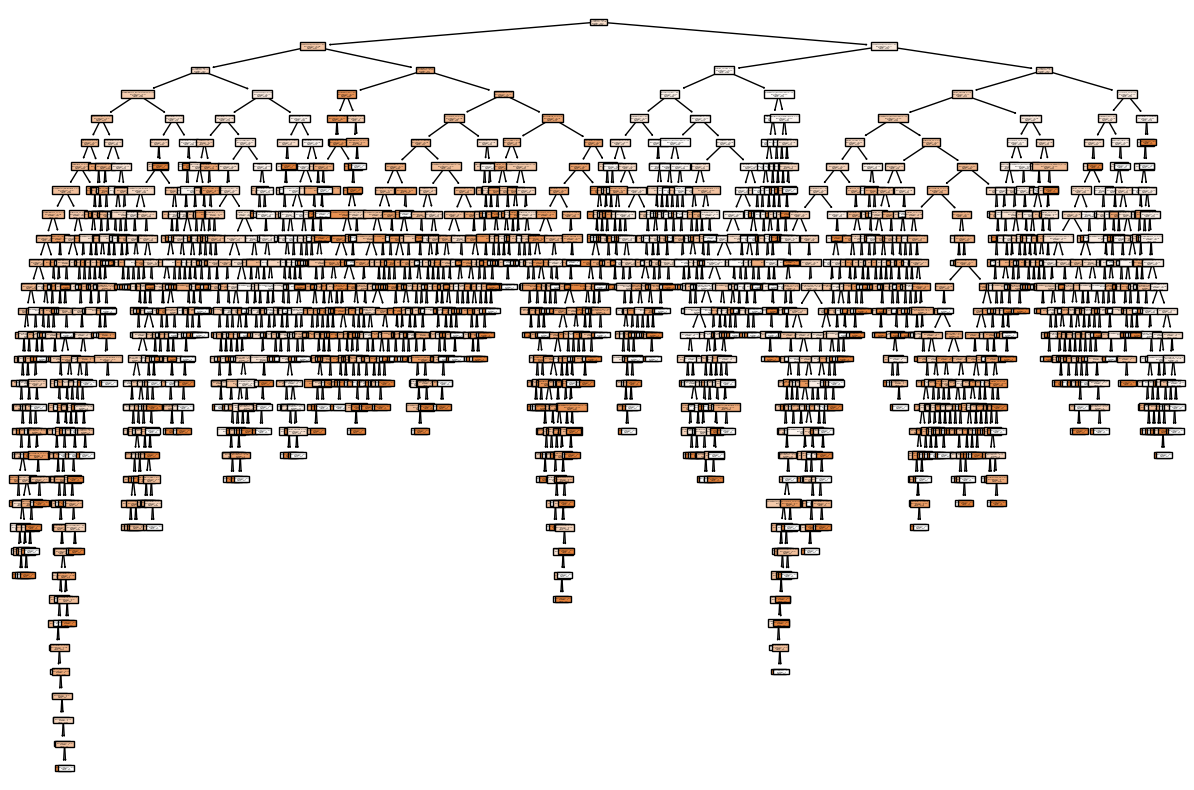

In [24]:
plt.figure(figsize=(15, 10))
plot_tree(regressor, filled=True, feature_names=feature_names)
plt.show()

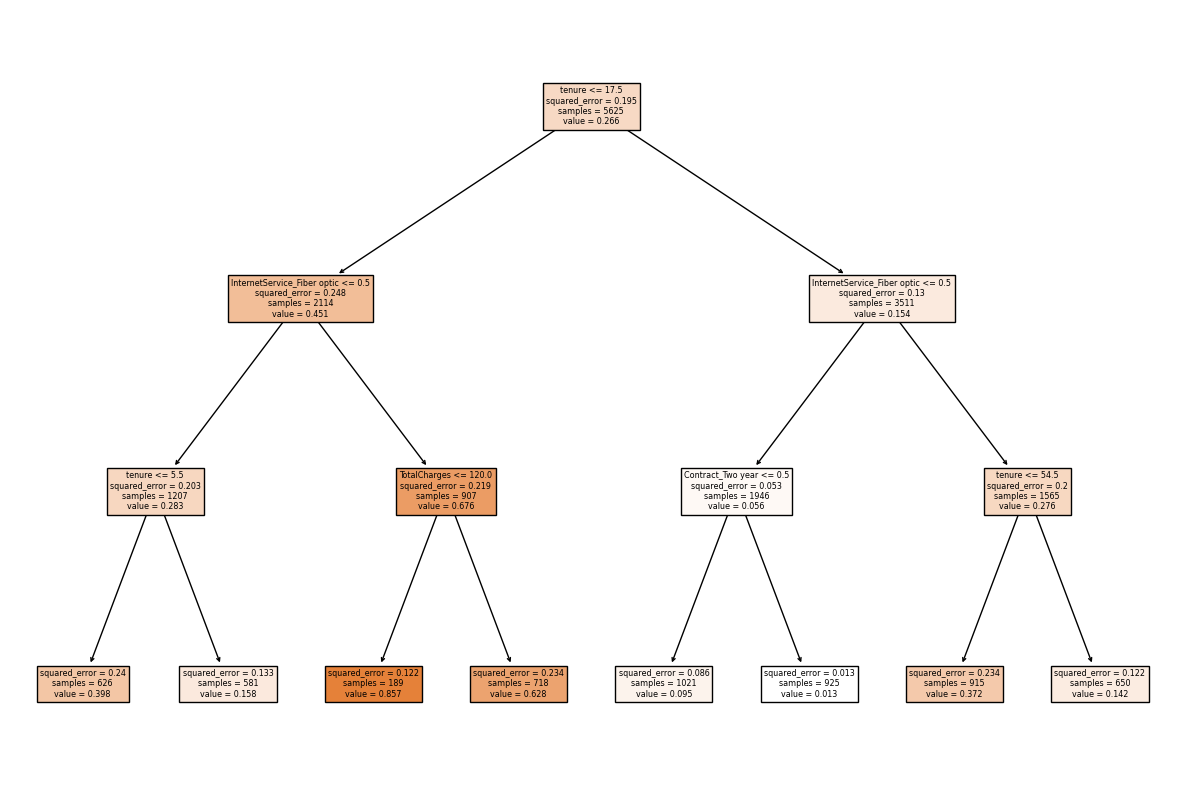

In [25]:
pruned_regressor = DecisionTreeRegressor(max_depth=3, min_samples_split=5, min_samples_leaf=5)
pruned_regressor.fit(X_train, y_train)



# Visualize the pruned decision tree
plt.figure(figsize=(15, 10))
plot_tree(pruned_regressor, filled=True, feature_names=feature_names)
plt.show()

In [26]:
print("Pruned Tree Feature importance:")
for feature_name, importance in zip(X_train.columns, pruned_regressor.feature_importances_):
    print(f"{feature_name}: {importance:.4f}")

Pruned Tree Feature importance:
SeniorCitizen: 0.0000
tenure: 0.5360
MonthlyCharges: 0.0000
TotalCharges: 0.0273
gender_Male: 0.0000
Partner_Yes: 0.0000
Dependents_Yes: 0.0000
PhoneService_Yes: 0.0000
MultipleLines_No phone service: 0.0000
MultipleLines_Yes: 0.0000
InternetService_Fiber optic: 0.4253
InternetService_No: 0.0000
OnlineSecurity_No internet service: 0.0000
OnlineSecurity_Yes: 0.0000
OnlineBackup_No internet service: 0.0000
OnlineBackup_Yes: 0.0000
DeviceProtection_No internet service: 0.0000
DeviceProtection_Yes: 0.0000
TechSupport_No internet service: 0.0000
TechSupport_Yes: 0.0000
StreamingTV_No internet service: 0.0000
StreamingTV_Yes: 0.0000
StreamingMovies_No internet service: 0.0000
StreamingMovies_Yes: 0.0000
Contract_One year: 0.0000
Contract_Two year: 0.0114
PaperlessBilling_Yes: 0.0000
PaymentMethod_Credit card (automatic): 0.0000
PaymentMethod_Electronic check: 0.0000
PaymentMethod_Mailed check: 0.0000


In [27]:
# Example prediction
X_test_reset = X_test.reset_index(drop=True)
sample = X_test_reset.iloc[0].values.reshape(1, -1)
prediction = pruned_regressor.predict(sample)

# Trace decision path
node_indicator = pruned_regressor.decision_path(sample)
leaf_id = pruned_regressor.apply(sample)

# Print decision path
print(f"Prediction: {prediction}")
print(f"Decision path: {node_indicator.indices}")
print(f"Leaf id: {leaf_id}")

Prediction: [0.01297297]
Decision path: [ 0  8  9 11]
Leaf id: [11]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


# Working with Linear Regression

In [28]:
# Linear Regression
linear_model = LinearRegression(fit_intercept=True)
linear_model.fit(X_train_scaled, y_train)
y_pred_lr = linear_model.predict(X_test_scaled)


# Calculate MSE, RMSE, R²
mse = mean_squared_error(y_test, y_pred_lr)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_lr)

# Output the results
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R²): {r2:.4f}")

Mean Squared Error (MSE): 0.1463
Root Mean Squared Error (RMSE): 0.3825
R-squared (R²): 0.2502


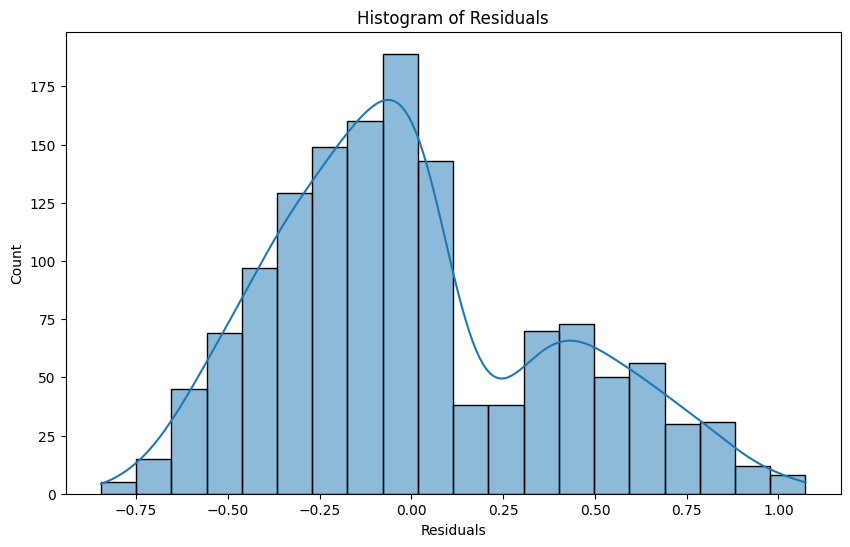

In [29]:
residuals = y_test - y_pred_lr

# Plot histogram of residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Histogram of Residuals')
plt.show()

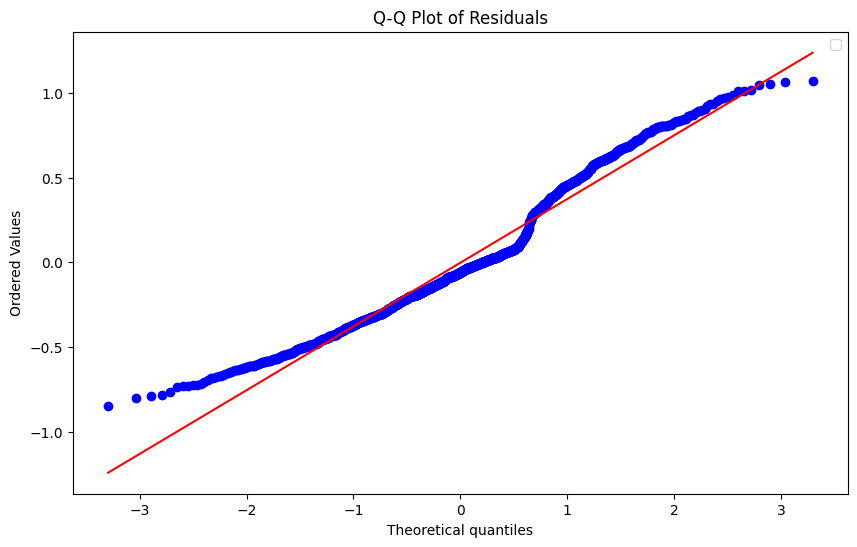

In [30]:
#
plt.figure(figsize=(10, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.legend()
plt.show()



Top 10 most influential features:
OnlineBackup_No internet service: 13485144454516.1191
DeviceProtection_No internet service: -5955959301901.0938
StreamingTV_No internet service: -1860772439651.4739
TechSupport_No internet service: -1481627685883.2747
StreamingMovies_No internet service: -1426546179176.7019
OnlineSecurity_No internet service: -1422521192143.2014
InternetService_No: -1337717655760.4685
MultipleLines_No phone service: -158542368958.7054
PhoneService_Yes: -158542368958.6941
InternetService_Fiber optic: 0.1324


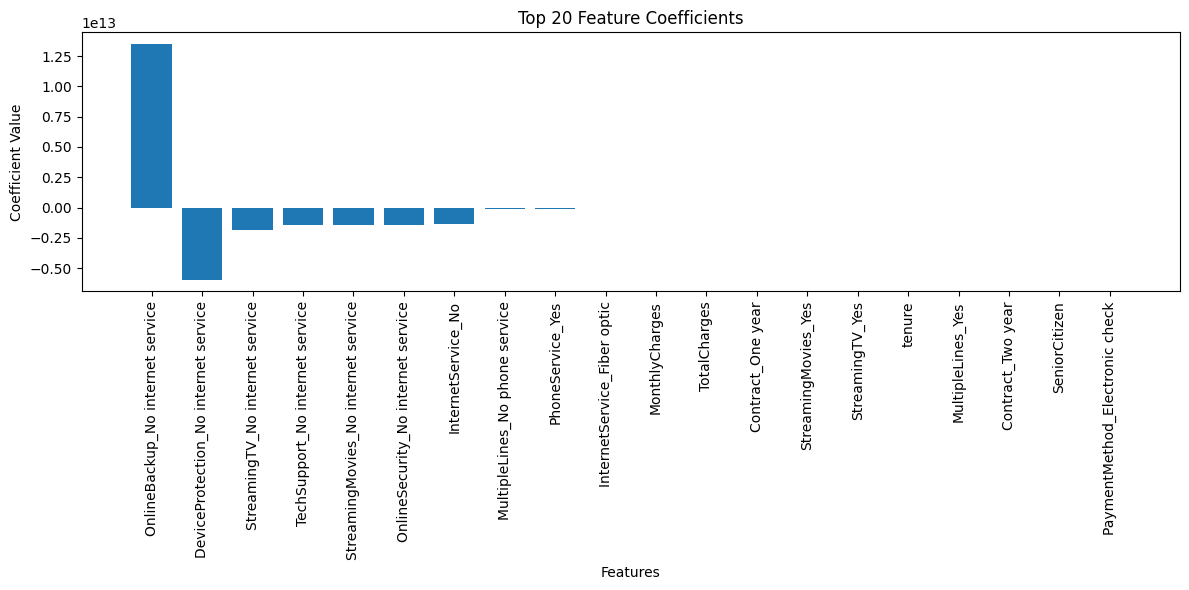

In [31]:
# Get feature names and coefficients
feature_names = X_train.columns
coefficients = linear_model.coef_

# Sort coefficients by absolute value
sorted_indices = np.argsort(np.abs(coefficients))[::-1]
sorted_features = feature_names[sorted_indices]
sorted_coefficients = coefficients[sorted_indices]

# Print top 10 most influential features
print("\nTop 10 most influential features:")
for feature, coef in zip(sorted_features[:10], sorted_coefficients[:10]):
    print(f"{feature}: {coef:.4f}")

# Visualize coefficients
plt.figure(figsize=(12, 6))
plt.bar(range(len(sorted_coefficients[:20])), sorted_coefficients[:20])
plt.xticks(range(len(sorted_coefficients[:20])), sorted_features[:20], rotation=90)
plt.title('Top 20 Feature Coefficients')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.tight_layout()
plt.show()

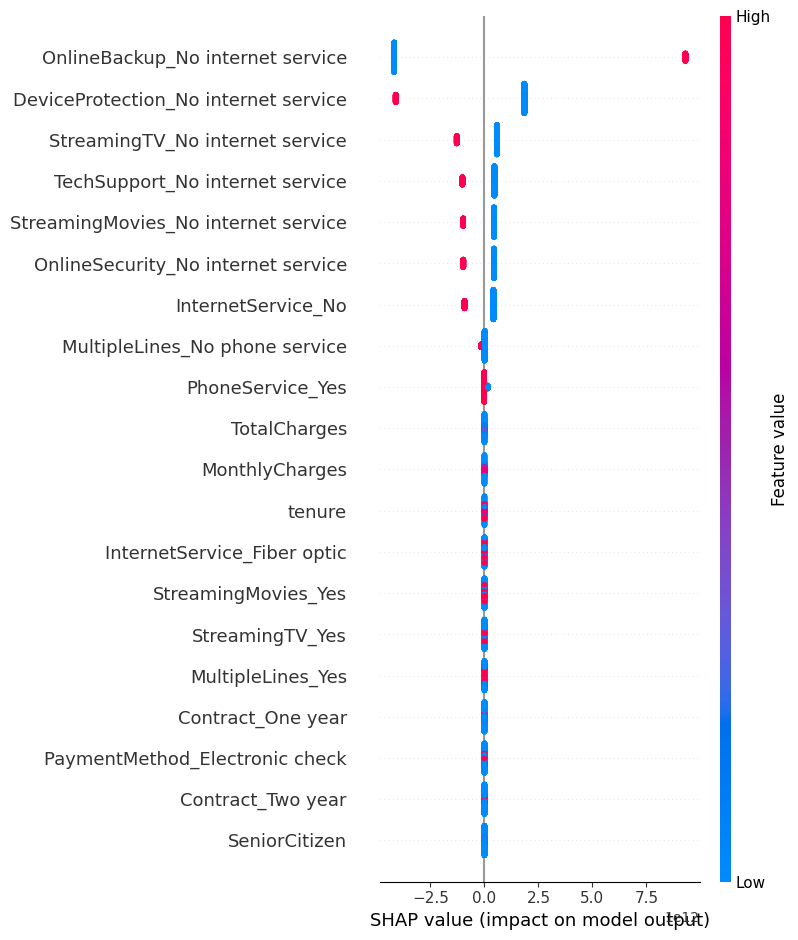

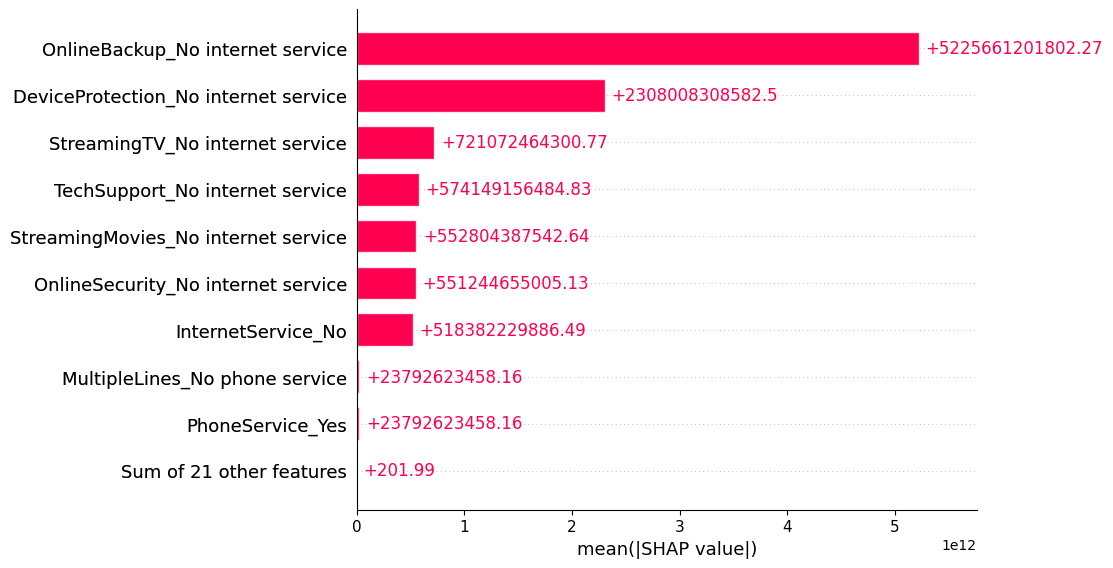

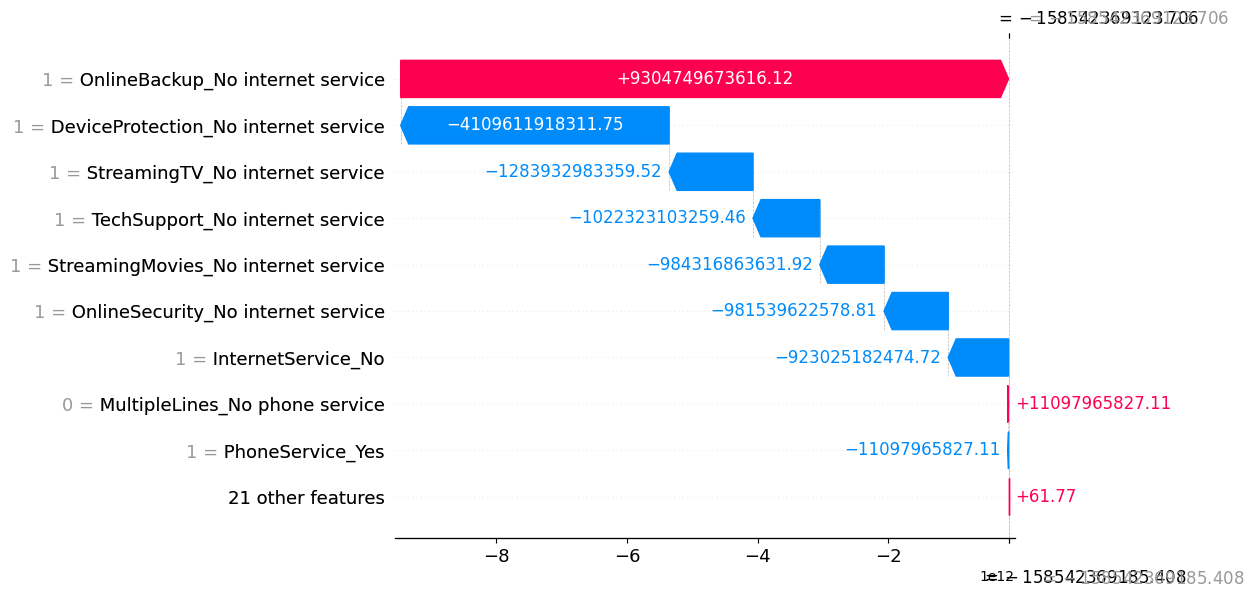

In [32]:
# Create a SHAP explainer for the linear regression model
explainer = shap.Explainer(linear_model, X_train)

# Compute SHAP values for the test set
shap_values = explainer(X_test)

# Summary plot
shap.summary_plot(shap_values, X_test)

# Force plot for a single prediction
shap.initjs()

# Use shap_values[0] directly, as it is already an Explanation object
shap.force_plot(explainer.expected_value, shap_values[0].values, X_test.iloc[0, :])

# Bar plot
shap.plots.bar(shap_values)

# Waterfall plot
shap.plots.waterfall(shap_values[0])

In [ ]:
feature_names = X_train.columns.tolist()

# Using LIME to explain the Linear Regression Model
explainer = lime.lime_tabular.LimeTabularExplainer(
    X_train_scaled,               # Training data
    feature_names= feature_names,
    class_names=data['Churn'],     # Class names for classification
    discretize_continuous=True,   # Discretize continuous features into bins for easier explanation
    random_state=42,
    mode='regression'  # or 'classification'
)

# Pick a single instance to explain
instance = X_test_scaled[0].reshape(1, -1)  # First instance from the test set

# Explain the prediction for this instance
exp = explainer.explain_instance(
    instance[0],                      # Instance to explain (1D array)
    linear_model.predict,            # Model's predict_proba function
    num_features=10,                    # Number of features to display in the explanation
    top_labels=3                       # Number of top labels to explain (for multi-class)
)

# Display the explanation in the notebook
exp.show_in_notebook(show_table=True, show_all=False)

exp.as_pyplot_figure()

# Working with Logistic Regression

In [ ]:
# Logistic Regression
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train_scaled, y_train)
y_pred_logistic = logistic_model.predict(X_test_scaled)
y_pred_proba = logistic_model.predict_proba(X_test_scaled)[:, 1]


# Evaluating the Logistic Regression
accuracy = accuracy_score(y_test, y_pred_logistic)
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC: {roc_auc:.4f}")
print(f"Logistic Regression Accuracy: {accuracy:.4f}")
print(classification_report(y_test, y_pred_logistic))

In [ ]:
# Get feature names and coefficients
feature_names = X_train.columns
coefficients = logistic_model.coef_[0]

# Sort coefficients by absolute value
sorted_indices = np.argsort(np.abs(coefficients))[::-1]
sorted_features = feature_names[sorted_indices]
sorted_coefficients = coefficients[sorted_indices]

# Print top 10 most influential features
print("\nTop 10 most influential features:")
for feature, coef in zip(sorted_features[:10], sorted_coefficients[:10]):
    print(f"{feature}: {coef:.4f}")

# Visualize coefficients
plt.figure(figsize=(12, 6))
plt.bar(range(len(sorted_coefficients[:20])), sorted_coefficients[:20])
plt.xticks(range(len(sorted_coefficients[:20])), sorted_features[:20], rotation=90)
plt.title('Top 20 Feature Coefficients')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.tight_layout()
plt.show()

# Calculate and plot odds ratios
odds_ratios = np.exp(sorted_coefficients[:20])
plt.figure(figsize=(12, 6))
plt.bar(range(len(odds_ratios)), odds_ratios)
plt.xticks(range(len(odds_ratios)), sorted_features[:20], rotation=90)
plt.title('Top 20 Feature Odds Ratios')
plt.xlabel('Features')
plt.ylabel('Odds Ratio')
plt.yscale('log')
plt.tight_layout()
plt.show()

In [ ]:
feature_names = X_train.columns.tolist()

# Using LIME to explain the Logistic Regression Model
explainer = lime.lime_tabular.LimeTabularExplainer(
    X_train_scaled,               # Training data
    feature_names= feature_names,
    class_names=data['Churn'],     # Class names for classification
    discretize_continuous=True,   # Discretize continuous features into bins for easier explanation
    random_state=42,
    mode='regression'  # or 'classification'
)

# Pick a single instance to explain
instance = X_test_scaled[0].reshape(1, -1)  # First instance from the test set

# Explain the prediction for this instance
exp = explainer.explain_instance(
    instance[0],                      # Instance to explain (1D array)
    logistic_model.predict_proba,            # Model's predict_proba function
    num_features=10,                    # Number of features to display in the explanation
    top_labels=3                       # Number of top labels to explain (for multi-class)
)

# Display the explanation in the notebook
exp.show_in_notebook(show_table=True, show_all=False)

# Visualize the explanation as a bar chart
exp.as_pyplot_figure()

In [ ]:
# ROC Curve for Logistic Regression
fpr, tpr, thresholds = roc_curve(y_test, logistic_model.predict_proba(X_test_scaled)[:,1])
plt.plot(fpr, tpr, label=f"AUC: {roc_auc_score(y_test, logistic_model.predict_proba(X_test_scaled)[:,1]):.4f}")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Gamma GLM with Log Link

In [ ]:
# Fit a Gamma GLM with log link
X_train_const = add_constant(X_train_scaled)
X_test_const = add_constant(X_test_scaled)
glm = GLM(y_train, X_train_const, family=Gamma(link=Log()))
glm_results = glm.fit()

# Make predictions
y_pred_glm = glm_results.predict(X_test_const)

# Calculate MSE and R^2
mse_glm = mean_squared_error(y_test, y_pred_glm)
r2_glm = r2_score(y_test, y_pred_glm)

print(f"GLM MSE: {mse_glm:.4f}, R^2: {r2_glm:.4f}")

# Interpret GLM
print("\nGLM Coefficients:")
for feature, coef in zip(['Intercept'] + list(X_train.columns), glm_results.params):
    print(f"{feature}: {coef:.4f}")

In [ ]:

# Extract the coefficients and feature names
feature_names = list(X_train.columns)
coefficients = glm_results.params[1:]

# Map the sign of coefficients to colors
colors = ['blue' if coef > 0 else 'orange' for coef in coefficients]

# Plot the coefficients
plt.figure(figsize=(20, 10))
bars = plt.barh(feature_names, coefficients, color=colors, edgecolor='black')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Gamma GLM Coefficients - TELCO Dataset')

for bar, coef in zip(bars, coefficients):
    plt.text(bar.get_width() + np.sign(bar.get_width()) * 0.025, bar.get_y() + bar.get_height() / 2, f'{coef:.2f}',
             va='center', ha='center')

plt.show()

# Working with GAM

In [ ]:
# Generalized Additive Model (GAM)
gam = LinearGAM(s(0) + s(1) + s(2))
gam.fit(X_train_scaled, y_train)
y_pred_gam = gam.predict(X_test_scaled)

In [ ]:
# Build GAM model
gam = LogisticGAM(n_splines=10)
gam.fit(X_train_scaled, y_train)

# Predict on test set
y_pred = gam.predict(X_test_scaled)
y_pred_proba = gam.predict_proba(X_test_scaled)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"Accuracy: {accuracy:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Print summary of the GAM model
print(gam.summary())

In [ ]:
# Build the GAM model
gam = LogisticGAM(n_splines=10)
gam.fit(X_train_scaled, y_train)

# Predict on test set
y_pred = gam.predict(X_test_scaled)
y_pred_proba = gam.predict_proba(X_test_scaled)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"Accuracy: {accuracy:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Print summary of the GAM model
print(gam.summary())

# Extract and print coefficients for each feature
print("\nGAM Coefficients:")

# Extract intercept
intercept = gam.coef_[0]
print(f"Intercept: {intercept:.4f}")

In [ ]:
# Number of terms excluding the intercept
n_terms = len(gam.terms) - 1  # Exclude the intercept

feature_names = X_train.columns


# Calculate number of rows and columns needed for subplots
n_cols = 4  # Set the number of columns (for example 3)
n_rows = int(np.ceil(n_terms / n_cols))  # Calculate the required number of rows

# Create the figure for plotting
plt.figure(figsize=(n_cols * 5, n_rows * 5))  # Adjust figure size based on rows and columns

# Loop over the terms to plot each partial dependence
plot_idx = 1
for i, term in enumerate(gam.terms):
    if term.isintercept:
        continue

    # Get the feature name corresponding to the term
    feature_name = feature_names[term.feature]  # Extract feature name

    # Create a subplot for each feature
    plt.subplot(n_rows, n_cols, plot_idx)
    XX = gam.generate_X_grid(term=i)
    pdep, confi = gam.partial_dependence(term=i, X=XX, width=0.95)
    plt.plot(XX[:, term.feature], pdep, label='Partial Dependence')
    plt.fill_between(XX[:, term.feature], confi[:, 0], confi[:, 1], alpha=0.2, label='95% Confidence Interval')

    # Use the feature name in the title and labels
    plt.title(f"Partial Dependence of {feature_name}")
    plt.ylabel('Partial Dependence')
    plt.xlabel(feature_name)
    plt.legend()

    plot_idx += 1  # Increment the plot index
# Adjust the layout
plt.tight_layout()
plt.show()

In [ ]:
feature_name = X_train.columns

# Build the terms with feature names
terms = [s(i) for i in range(len(feature_name))]

# Create the GAM model with the specified terms
gam = LinearGAM(terms)

# Perform grid search to find optimal smoothing parameters
gam.gridsearch(X_train_scaled, y_train)

# Fit the model
gam.fit(X_train_scaled.values, y_train)

# Predict on test set
y_pred = gam.predict(X_test_scaled.values)

# Print the model summary
gam.summary()

# Visualize GAM
plt.figure(figsize=(20, 15))
for i, term in enumerate(gam.terms):
    if term.isintercept:
        continue
    plt.subplot(4, 3, i+1)
    XX = gam.generate_X_grid(term=i)
    pdep, confi = gam.partial_dependence(term=i, X=XX, width=0.95)
    plt.plot(XX[:, term.feature], pdep, label='Partial Dependence')
    plt.fill_between(XX[:, term.feature], confi[:, 0], confi[:, 1], alpha=0.2, label='95% Confidence Interval')
    plt.title(gam.feature[i])
    plt.ylabel('Partial dependence')
    plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Build GAM model
gam = LinearGAM(s(0) + s(1) + s(2) + s(3) + s(4) + s(5) + s(6) + s(7) + s(8) + s(9))
gam.gridsearch(X_train_scaled, y_train)

#Fitting the model
gam.fit(X_train_scaled, y_train)

# Make predictions
y_pred_gam = gam.predict(X_test_scaled)

# Calculate MSE and R^2
mse_gam = mean_squared_error(y_test, y_pred_gam)
r2_gam = r2_score(y_test, y_pred_gam)

print(f"GAM MSE: {mse_gam:.4f}, R^2: {r2_gam:.4f}")

gam.summary()


# Visualize GAM
plt.figure(figsize=(20, 15))
for i, term in enumerate(gam.terms):
    if term.isintercept:
        continue
    plt.subplot(4, 3, i+1)
    XX = gam.generate_X_grid(term=i)
    pdep, confi = gam.partial_dependence(term=i, X=XX, width=0.95)
    plt.plot(XX[:, term.feature], pdep, label='Partial Dependence')
    plt.fill_between(XX[:, term.feature], confi[:, 0], confi[:, 1], alpha=0.2, label='95% Confidence Interval')
    plt.title(gam.feature[i])
    plt.ylabel('Partial dependence')
    plt.legend()
plt.tight_layout()
plt.show()

# Final Reccomendation:


Based on the findings


# References: